### Write a Python program to demonstrate image data augmentation techniques. 

In [75]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom,RandomContrast
from tensorflow.keras.models import Sequential

In [77]:
(train_ds,val_ds,test_ds),metadata=tfds.load(
    'tf_flowers',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True
)

In [79]:
Batch_size = 32
img_size = (180,180)

def preprocess_image(image,label):
    image = tf.image.resize(image,img_size)
    image = image/255.0
    return image,label

In [81]:
train_ds = train_ds.map(preprocess_image,num_parallel_calls = tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_image,num_parallel_calls = tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_image,num_parallel_calls = tf.data.AUTOTUNE)

In [83]:
data_augmentation=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
])

In [97]:
def plot_images(original, augmented):
    plt.figure(figsize=(10,4))
    for i in range(len(original)):
        plt.subplot(2,len(original),i+1)
        plt.imshow(original[i])
        plt.title("Original")

        plt.subplot(2,len(augmented),len(original)+i+1)
        plt.imshow(augmented[i])
        plt.title("Augmented")
    plt.tight_layout()
    plt.show()

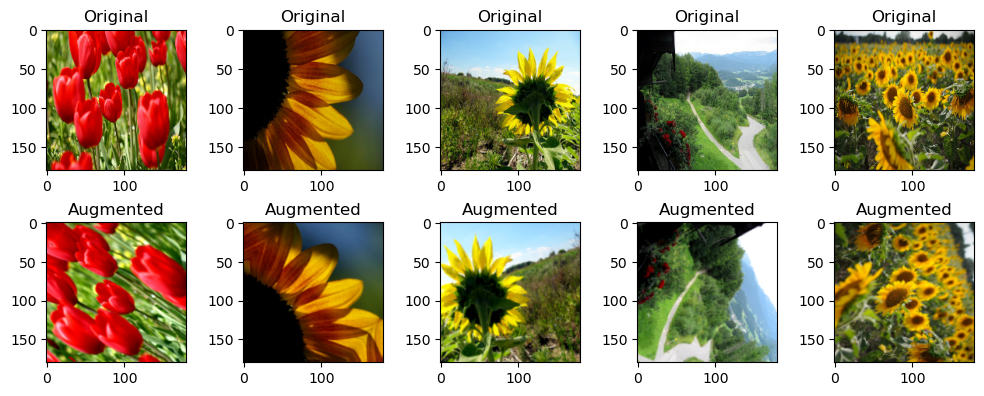

In [99]:
num_images=5
sample_images=[]
for image,_ in train_ds.take(num_images):
    sample_images.append(image)

augmented_images=data_augmentation(tf.convert_to_tensor(sample_images),training=True)
plot_images(sample_images,augmented_images.numpy())